In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
from kneed import KneeLocator

In [59]:
IFP_Option3 = pd.read_csv("2RH1_IFP_Option3.csv")
IFP_Option3 = IFP_Option3.fillna(0)

IFP_Option4 = pd.read_csv("2RH1_IFP_Option4.csv")
IFP_Option4 = IFP_Option4.fillna(0)

In [ ]:
### File

Cluster 1 area: 5.04
Cluster 2 area: 6.70
Cluster 3 area: 5.30
Cluster 4 area: 8.02
Cluster 5 area: 3.66


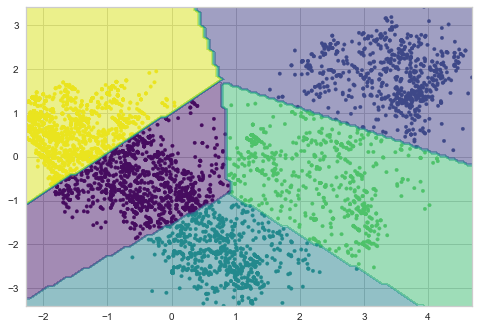

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import ConvexHull
from kneed import KneeLocator

data = IFP_Option4.drop(IFP_Option4.columns[0], axis=1)

# 데이터를 numpy 배열로 변환
X = data.values
X = X.astype(int)

# PCA를 사용하여 데이터의 차원을 2로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means 클러스터링
inertia = []
k_values = list(range(1, 50))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    
kneedle = KneeLocator(k_values, inertia, S=1.0, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

# 적절한 클러스터 개수로 k-means 클러스터링
kmeans = KMeans(n_clusters=elbow_point)
clusters = kmeans.fit_predict(X_pca)

# 그래프 그리기
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')

# 등고선 그래프 그리기
x = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100)
y = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

X_grid_flat = X_grid.ravel()
Y_grid_flat = Y_grid.ravel()
grid_points = np.column_stack((X_grid_flat, Y_grid_flat))
Z_grid = kmeans.predict(grid_points)
Z_grid = Z_grid.reshape(X_grid.shape)
plt.contourf(X_grid, Y_grid, Z_grid, alpha=0.5, cmap='viridis')

# 각 클러스터의 면적 계산 및 출력
cluster_areas = []
for i in range(elbow_point):
    cluster_points = X_pca[clusters == i]
    hull = ConvexHull(cluster_points)
    area = hull.volume
    cluster_areas.append(area)
    print(f"Cluster {i + 1} area: {area:.2f}")

plt.show()

Cluster 1 area: 8.19
Cluster 2 area: 2.62
Cluster 3 area: 4.87
Cluster 4 area: 6.31
Cluster 5 area: 8.09


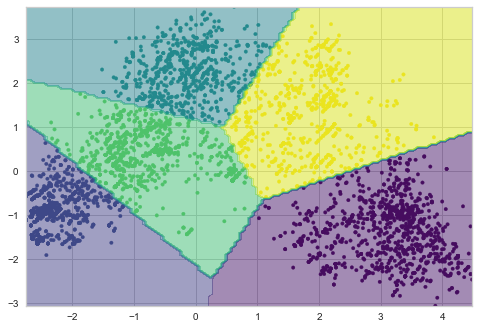

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import ConvexHull
from kneed import KneeLocator

data = IFP_Option5.drop(IFP_Option5.columns[0], axis=1)

# 데이터를 numpy 배열로 변환
X = data.values
X = X.astype(int)

# PCA를 사용하여 데이터의 차원을 2로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means 클러스터링
inertia = []
k_values = list(range(1, 50))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    
kneedle = KneeLocator(k_values, inertia, S=1.0, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

# 적절한 클러스터 개수로 k-means 클러스터링
kmeans = KMeans(n_clusters=elbow_point)
clusters = kmeans.fit_predict(X_pca)

# 그래프 그리기
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')

# 등고선 그래프 그리기
x = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100)
y = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

X_grid_flat = X_grid.ravel()
Y_grid_flat = Y_grid.ravel()
grid_points = np.column_stack((X_grid_flat, Y_grid_flat))
Z_grid = kmeans.predict(grid_points)
Z_grid = Z_grid.reshape(X_grid.shape)
plt.contourf(X_grid, Y_grid, Z_grid, alpha=0.5, cmap='viridis')

# 각 클러스터의 면적 계산 및 출력
cluster_areas = []
for i in range(elbow_point):
    cluster_points = X_pca[clusters == i]
    hull = ConvexHull(cluster_points)
    area = hull.volume
    cluster_areas.append(area)
    print(f"Cluster {i + 1} area: {area:.2f}")

plt.show()

Cluster 1 area: 1.66
Cluster 2 area: 7.41
Cluster 3 area: 6.03
Cluster 4 area: 4.39
Cluster 5 area: 3.93
Cluster 6 area: 2.94
Cluster 1 row indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 20

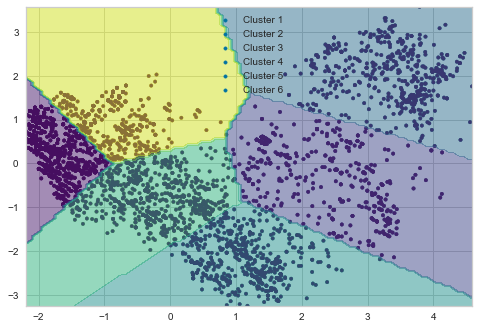

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import ConvexHull
from kneed import KneeLocator

data = IFP_Option3.drop(IFP_Option3.columns[0], axis=1)

# 데이터를 numpy 배열로 변환
X = data.values
X = X.astype(int)

# PCA를 사용하여 데이터의 차원을 2로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means 클러스터링
inertia = []
k_values = list(range(1, 50))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    
kneedle = KneeLocator(k_values, inertia, S=1.0, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

# 적절한 클러스터 개수로 k-means 클러스터링
kmeans = KMeans(n_clusters=elbow_point)
clusters = kmeans.fit_predict(X_pca)

# 그래프 그리기
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')
for cluster_id in range(elbow_point):
    cluster_points = X_pca[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cluster_id] * len(cluster_points), cmap='viridis', marker='.', label=f'Cluster {cluster_id + 1}')





# 등고선 그래프 그리기
x = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100)
y = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

X_grid_flat = X_grid.ravel()
Y_grid_flat = Y_grid.ravel()
grid_points = np.column_stack((X_grid_flat, Y_grid_flat))
Z_grid = kmeans.predict(grid_points)
Z_grid = Z_grid.reshape(X_grid.shape)
plt.contourf(X_grid, Y_grid, Z_grid, alpha=0.5, cmap='viridis')

# 각 클러스터의 면적 계산 및 출력
cluster_areas = []
cluster_indices = [[] for _ in range(elbow_point)]
for i in range(elbow_point):
    cluster_points = X_pca[clusters == i]
    hull = ConvexHull(cluster_points)
    area = hull.volume
    cluster_areas.append(area)
    cluster_indices[i] = np.where(clusters == i)[0].tolist()

    print(f"Cluster {i + 1} area: {area:.2f}")

# 각 클러스터에 해당하는 데이터의 행 번호 리스트 출력
for cluster_id, indices in enumerate(cluster_indices):
    print(f"Cluster {cluster_id + 1} row indices: {indices}")
    
plt.legend()
plt.show()


Cluster 1 area: 2.94
Cluster 2 area: 7.41
Cluster 3 area: 4.39
Cluster 4 area: 1.66
Cluster 5 area: 3.93
Cluster 6 area: 6.03
Cluster 1 data indices: [5, 14, 23, 24, 40, 63, 95, 103, 158, 169, 187, 192, 221, 224, 241, 242, 247, 274, 281, 291, 299, 306, 311, 326, 329, 332, 333, 335, 344, 349, 350, 358, 363, 369, 375, 382, 383, 385, 391, 404, 409, 413, 415, 419, 422, 423, 424, 425, 427, 428, 429, 432, 433, 435, 436, 437, 438, 440, 444, 445, 447, 448, 450, 452, 454, 455, 459, 460, 463, 464, 465, 466, 467, 469, 470, 471, 473, 474, 475, 476, 477, 479, 480, 481, 489, 493, 494, 495, 496, 497, 498, 500, 501, 503, 504, 506, 508, 513, 516, 519, 521, 522, 523, 524, 526, 532, 541, 545, 554, 556, 559, 561, 570, 571, 580, 581, 592, 607, 611, 617, 619, 620, 627, 628, 630, 634, 636, 638, 652, 659, 663, 665, 672, 674, 675, 678, 687, 690, 692, 694, 696, 698, 699, 700, 701, 704, 705, 706, 708, 709, 710, 712, 714, 716, 720, 721, 724, 726, 728, 730, 731, 735, 740, 743, 748, 752, 759, 760, 768, 776, 778, 78

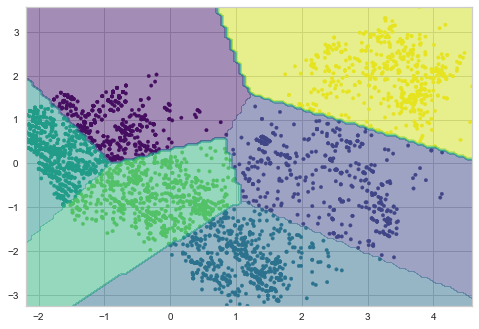

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import ConvexHull
from kneed import KneeLocator

data = IFP_Option3.drop(IFP_Option3.columns[0], axis=1)

# 데이터를 numpy 배열로 변환
X = data.values
X = X.astype(int)

# PCA를 사용하여 데이터의 차원을 2로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means 클러스터링
inertia = []
k_values = list(range(1, 50))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    
kneedle = KneeLocator(k_values, inertia, S=1.0, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

# 적절한 클러스터 개수로 k-means 클러스터링
kmeans = KMeans(n_clusters=elbow_point)
clusters = kmeans.fit_predict(X_pca)

# 그래프 그리기
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')

# 등고선 그래프 그리기
x = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100)
y = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

X_grid_flat = X_grid.ravel()
Y_grid_flat = Y_grid.ravel()
grid_points = np.column_stack((X_grid_flat, Y_grid_flat))
Z_grid = kmeans.predict(grid_points)
Z_grid = Z_grid.reshape(X_grid.shape)
plt.contourf(X_grid, Y_grid, Z_grid, alpha=0.5, cmap='viridis')

# 각 클러스터의 면적 계산 및 출력
cluster_areas = []
cluster_indices = [[] for _ in range(elbow_point)]
for i in range(elbow_point):
    cluster_points = X_pca[clusters == i]
    hull = ConvexHull(cluster_points)
    area = hull.volume
    cluster_areas.append(area)
    cluster_indices[i] = np.where(clusters == i)[0].tolist()

    print(f"Cluster {i + 1} area: {area:.2f}")

# 각 클러스터에 해당하는 데이터의 행 번호를 리스트로 저장
cluster_data_indices = [indices for indices in cluster_indices]

# 클러스터별 데이터의 행 번호 리스트 출력
for cluster_id, indices in enumerate(cluster_data_indices):
    print(f"Cluster {cluster_id + 1} data indices: {indices}")

plt.show()


In [80]:
cluster_indices1

NameError: name 'cluster_indices1' is not defined

In [ ]:
cluster_data_indices[0]
cluster_data_indices[1]
cluster_data_indices[2]
cluster_data_indices[3]
cluster_data_indices[4]
cluster_data_indices[5]

In [103]:

IFP_Option3_result = pd.read_csv("2RH1_IFP_Option3_Result.csv")
rmsd_columns = [col for col in IFP_Option3_result.columns if 'rmsd' in col]
print(rmsd_columns)

['glide rmsd to input']


In [125]:
extracted_data0 = IFP_Option3_result.iloc[cluster_data_indices[0]]
extracted_data1 = IFP_Option3_result.iloc[cluster_data_indices[1]]
extracted_data2 = IFP_Option3_result.iloc[cluster_data_indices[2]]
extracted_data3 = IFP_Option3_result.iloc[cluster_data_indices[3]]
extracted_data4 = IFP_Option3_result.iloc[cluster_data_indices[4]]
extracted_data5 = IFP_Option3_result.iloc[cluster_data_indices[5]]


In [148]:
mean_value = extracted_data0['glide rmsd to input'].mean()
std_value = extracted_data0['glide rmsd to input'].std()

print("Mean0:", mean_value)
print("Standard Deviation0:", std_value)

mean_value = extracted_data1['glide rmsd to input'].mean()
std_value = extracted_data1['glide rmsd to input'].std()

print("Mean1:", mean_value)
print("Standard Deviation1:", std_value)


mean_value = extracted_data2['glide rmsd to input'].mean()
std_value = extracted_data2['glide rmsd to input'].std()

print("Mean2:", mean_value)
print("Standard Deviation2:", std_value)


mean_value = extracted_data3['glide rmsd to input'].mean()
std_value = extracted_data3['glide rmsd to input'].std()

print("Mean3:", mean_value)
print("Standard Deviation3:", std_value)


mean_value = extracted_data4['glide rmsd to input'].mean()
std_value = extracted_data4['glide rmsd to input'].std()

print("Mean4:", mean_value)
print("Standard Deviation4:", std_value)


mean_value = extracted_data5['glide rmsd to input'].mean()
std_value = extracted_data5['glide rmsd to input'].std()

print("Mean5:", mean_value)
print("Standard Deviation5:", std_value)

Mean0: 3.34062215477997
Standard Deviation0: 2.6075742984156096
Mean1: 6.164374458874458
Standard Deviation1: 2.341926629693811
Mean2: 5.143401550387597
Standard Deviation2: 2.701172688454912
Mean3: 2.5045334215751156
Standard Deviation3: 2.2345556913600393
Mean4: 4.478920297555792
Standard Deviation4: 2.5456873437544134
Mean5: 6.415896946564886
Standard Deviation5: 2.2222944469314934


In [149]:
IFP_Option3 = pd.read_csv("2RH1_IFP_Option3.csv")
IFP_Option3 = IFP_Option3.fillna(0)

In [150]:
IFP_Option3_data0 = IFP_Option3.iloc[cluster_data_indices[0]]
IFP_Option3_data1 = IFP_Option3.iloc[cluster_data_indices[1]]
IFP_Option3_data2 = IFP_Option3.iloc[cluster_data_indices[2]]
IFP_Option3_data3 = IFP_Option3.iloc[cluster_data_indices[3]]
IFP_Option3_data4 = IFP_Option3.iloc[cluster_data_indices[4]]
IFP_Option3_data5 = IFP_Option3.iloc[cluster_data_indices[5]]

In [151]:
# Merge the data
merged_data = pd.concat([IFP_Option3_data0, IFP_Option3_data1, IFP_Option3_data2, IFP_Option3_data3, IFP_Option3_data4, IFP_Option3_data5])

# Add a source column indicating the origin of the data
merged_data['source'] = ['data0'] * len(IFP_Option3_data0) + ['data1'] * len(IFP_Option3_data1) + ['data2'] * len(IFP_Option3_data2) + ['data3'] * len(IFP_Option3_data3) + ['data4'] * len(IFP_Option3_data4) + ['data5'] * len(IFP_Option3_data5)

# Display the merged data with the added source column
print(merged_data.head())


   Title  A29_contact  A29_backbone  A29_sidechain  A29_polar  \
5   2RH1            0             0              0          0   
14  2RH1            0             0              0          0   
23  2RH1            0             0              0          0   
24  2RH1            0             0              0          0   
40  2RH1            0             0              0          0   

    A29_hydrophobic  A29_acceptor  A29_donor  A29_aromatic  A29_charged  ...  \
5                 0             0          0             0            0  ...   
14                0             0          0             0            0  ...   
23                0             0          0             0            0  ...   
24                0             0          0             0            0  ...   
40                0             0          0             0            0  ...   

    A342_contact  A342_backbone  A342_sidechain  A342_polar  A342_hydrophobic  \
5              0              0               0

In [152]:
# Perform one-hot encoding on the 'source' column
onehot_encoded = pd.get_dummies(merged_data['source'], prefix='source')

# Concatenate the one-hot encoded columns with the merged data
merged_data_encoded = pd.concat([merged_data, onehot_encoded], axis=1)

# Drop the original 'source' column
merged_data_encoded.drop('source', axis=1, inplace=True)

# Display the merged data with one-hot encoded 'source' column
print(merged_data_encoded.head())


   Title  A29_contact  A29_backbone  A29_sidechain  A29_polar  \
5   2RH1            0             0              0          0   
14  2RH1            0             0              0          0   
23  2RH1            0             0              0          0   
24  2RH1            0             0              0          0   
40  2RH1            0             0              0          0   

    A29_hydrophobic  A29_acceptor  A29_donor  A29_aromatic  A29_charged  ...  \
5                 0             0          0             0            0  ...   
14                0             0          0             0            0  ...   
23                0             0          0             0            0  ...   
24                0             0          0             0            0  ...   
40                0             0          0             0            0  ...   

    A342_acceptor  A342_donor  A342_aromatic  A342_charged  source_data0  \
5               0           0              0        

In [160]:
merged_data_encoded

,Title,A29_contact,A29_backbone,A29_sidechain,A29_polar,A29_hydrophobic,A29_acceptor,A29_donor,A29_aromatic,A29_charged,...,A342_acceptor,A342_donor,A342_aromatic,A342_charged,source_data0,source_data1,source_data2,source_data3,source_data4,source_data5
5,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4739,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4740,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4741,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [162]:
merged_data_encoded

,Title,A29_contact,A29_backbone,A29_sidechain,A29_polar,A29_hydrophobic,A29_acceptor,A29_donor,A29_aromatic,A29_charged,...,A342_acceptor,A342_donor,A342_aromatic,A342_charged,source_data0,source_data1,source_data2,source_data3,source_data4,source_data5
5,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4739,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4740,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4741,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [169]:
Independent_variable1

,Title,A29_contact,A29_backbone,A29_sidechain,A29_polar,A29_hydrophobic,A29_acceptor,A29_donor,A29_aromatic,A29_charged,...,A341_charged,A342_contact,A342_backbone,A342_sidechain,A342_polar,A342_hydrophobic,A342_acceptor,A342_donor,A342_aromatic,A342_charged
5,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4739,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4740,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4741,2RH1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
Independent_variable1.shape

(4743, 2538)

In [177]:

# 독립 변수
Independent_variable1 = merged_data_encoded.iloc[:, 1:-6]

# 종속 변수
Dependent_variable1 = merged_data_encoded.iloc[:, -6:]  # 6개의 출력

X_train1, X_test1, y_train1, y_test1 = train_test_split(Independent_variable1, Dependent_variable1, test_size=0.2)

# 독립 변수 데이터 타입 변환
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')

# 종속 변수 데이터 타입 변환
y_train1 = y_train1.astype('float32')
y_test1 = y_test1.astype('float32')


leaky_relu = tf.nn.leaky_relu
X = tf.keras.layers.Input(shape=[2538])
H = tf.keras.layers.Dense(2000, activation=leaky_relu)(X)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(1000, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(500, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(256, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(128, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(64, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(32, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(16, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
Y = tf.keras.layers.Dense(6, activation='softmax')(H)  # 6개의 출력, softmax 활성화 함수

model1 = tf.keras.models.Model(X, Y)

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',  # categorical_crossentropy 손실 함수
               metrics=['accuracy'])

hist1 = model1.fit(X_train1, y_train1, epochs=100)
model1.evaluate(X_test1, y_test1, verbose=2)

print(hist1.history['loss'])
print(hist1.history['accuracy'])


Epoch 1/100
119/119 [==============================] - 4s 27ms/step - loss: 1.2166 - accuracy: 0.5171
Epoch 2/100
119/119 [==============================] - 3s 27ms/step - loss: 0.6105 - accuracy: 0.8131
Epoch 3/100
119/119 [==============================] - 3s 27ms/step - loss: 0.4450 - accuracy: 0.8769
Epoch 4/100
119/119 [==============================] - 3s 27ms/step - loss: 0.4182 - accuracy: 0.8798
Epoch 5/100
119/119 [==============================] - 3s 27ms/step - loss: 0.3671 - accuracy: 0.9006
Epoch 6/100
119/119 [==============================] - 3s 27ms/step - loss: 0.3239 - accuracy: 0.9088
Epoch 7/100
119/119 [==============================] - 3s 27ms/step - loss: 0.3674 - accuracy: 0.8951
Epoch 8/100
119/119 [==============================] - 3s 27ms/step - loss: 0.3158 - accuracy: 0.9054
Epoch 9/100
119/119 [==============================] - 3s 27ms/step - loss: 0.2530 - accuracy: 0.9241
Epoch 10/100
119/119 [==============================] - 3s 27ms/step - loss: 0.263

KeyboardInterrupt: 

In [ ]:
az 

In [ ]:
dataset = pd.read_csv('DLdata_GRCP_Interaction_n20_TEST_set.csv',low_memory=False)

dataset_training_set1 = dataset[:-340] ### TEST 셋 제거


dataset_training_set1 = dataset[:-340] ### TEST 셋 제거
dataset_training_set1 = dataset[:-340] ### TEST 셋 제거
# 독립 변수
Independent_variable1 = dataset_training_set1.iloc[:,1:-2]
# 종속 변수
Dependent_variable1 = dataset_training_set1.iloc[:,-2:]
​
X_train1, X_test1, y_train1, y_test1 = train_test_split(Independent_variable1, Dependent_variable1, test_size=0.2)


# 독립 변수
Independent_variable1 = dataset_training_set1.iloc[:,1:-2]
# 종속 변수
Dependent_variable1 = dataset_training_set1.iloc[:,-2:]

X_train1, X_test1, y_train1, y_test1 = train_test_split(Independent_variable1, Dependent_variable1, test_size=0.2)

leaky_relu = tf.nn.leaky_relu
X = tf.keras.layers.Input(shape=[16497])
H = tf.keras.layers.Dense(5000, activation=leaky_relu)(X)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(3000, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(2000, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(1000, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(500, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(256, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(128, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(64, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(32, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
H = tf.keras.layers.Dense(16, activation=leaky_relu)(H)
H = tf.nn.dropout(H, 0.3)
Y = tf.keras.layers.Dense(2, activation='sigmoid')(H)

model1 = tf.keras.models.Model(X, Y)

#opt1 = keras.optimizers.Adam(learning_rate=0.0001) ## import keras
model1.compile(optimizer = 'adam',
              loss='binary_crossentropy', 
              metrics = ['accuracy'])



hist1 = model1.fit(X_train1, y_train1, epochs=100)
model1.evaluate(X_test1, y_test1, verbose=2)

print(hist1.history['loss'])
print(hist1.history['accuracy'])

In [117]:
import matplotlib.pyplot as plt

# 데이터 준비
data = [extracted_data0['glide rmsd to input'],
        extracted_data1['glide rmsd to input'],
        extracted_data2['glide rmsd to input'],
        extracted_data3['glide rmsd to input'],
        extracted_data4['glide rmsd to input'],
        extracted_data5['glide rmsd to input']]

# 박스 플롯 그리기
#plt.boxplot(data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
#plt.xlabel('Cluster')
#plt.ylabel('glide rmsd to input')
#plt.title('Box Plot of glide rmsd to input by Cluster')
#plt.show()


In [118]:
data

[5       1.085
 14      0.778
 23      0.921
 24      1.114
 40      0.403
         ...  
 4387    8.031
 4388    8.635
 4419    7.047
 4442    4.634
 4734    6.171
 Name: glide rmsd to input, Length: 659, dtype: float64,
 936     3.577
 1160    3.570
 1167    2.253
 1206    2.598
 1223    0.769
         ...  
 4725    8.658
 4726    5.707
 4729    5.656
 4735    8.613
 4737    8.519
 Name: glide rmsd to input, Length: 462, dtype: float64,
 1034     3.608
 1131     3.562
 1134     1.043
 1149     2.313
 1179     1.221
          ...  
 4453     8.648
 4468     8.476
 4500     6.289
 4547     9.141
 4694    10.381
 Name: glide rmsd to input, Length: 645, dtype: float64,
 0         NaN
 1       1.152
 2       0.905
 3       0.804
 4       1.162
         ...  
 4213    7.843
 4271    8.553
 4309    2.750
 4328    4.187
 4372    3.855
 Name: glide rmsd to input, Length: 1512, dtype: float64,
 649     0.690
 653     0.764
 681     0.783
 683     0.766
 697     0.778
         ...  
 4553    4